# 1. Importing and exploring images

Let's import and investigate data:

In [1]:
import pandas as pd
import numpy as np

import pandas as pd
PATH = '/home/paul/imet-2020-fgvc7/'
labels = pd.read_csv(PATH + 'train.csv')
labels['id']= labels['id'] + '.png'
labels['attribute_ids'] = labels['attribute_ids'].apply(lambda x : x.split())

#labels = pd.read_csv(PATH + 'train.csv')
#labels_kfold = pd.read_parquet('/kaggle/input/imet-2020-multilabelstratifiedkfold/labels_kfold')
#labels_kfold['attribute_ids'] = labels_kfold['attribute_ids'].apply(list)

In [2]:
labels

,id,attribute_ids
0,000040d66f14ced4cdd18cd95d91800f.png,"[448, 2429, 782]"
1,0000ef13e37ef70412166725ec034a8a.png,"[2997, 3231, 2730, 3294, 3099, 2017, 784]"
2,0001eeb4a06e8daa7c6951bcd124c3c7.png,"[2436, 1715, 23]"
3,000226398d224de78b191e6db45fd94e.png,"[2997, 3433, 448, 782]"
4,00029c3b0171158d63b1bbf803a7d750.png,"[3465, 3322, 3170, 1553, 781]"
...,...,...
142114,fffd00c472c1856f5c8b7e41311e2344.png,"[125, 783, 96, 27]"
142115,fffdb3cde6cfd3b335fc56ecf2f1eae5.png,"[2732, 3170, 448, 1559, 785]"
142116,fffdde4325edb076dccea37978c1378a.png,"[2813, 233, 1561, 785]"
142117,fffe25dccc93a5e9e12f26d494dae26f.png,"[3095, 408, 1610, 1470, 1899, 1449]"


In [3]:
import os.path

N_FOLDS = 5

labels_kfold_filename = 'labels_kfold_' + str(N_FOLDS)

if os.path.isfile(labels_kfold_filename):
    print ("File labels_kfold exist")
    labels_kfold = pd.read_parquet(labels_kfold_filename)
else:
    from sklearn.preprocessing import MultiLabelBinarizer
    import numpy as np

    #!pip install iterative-stratification
    from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

    

    X = labels.id.values

    y = []
    for i in range(len(labels)): y.append(labels.attribute_ids.values[i])
    mlb = MultiLabelBinarizer()
    y_mlb = mlb.fit_transform(y)



    labels['fold'] = np.nan

    #split data
    mskf = MultilabelStratifiedKFold(n_splits=N_FOLDS)
    for i, (_, test_index) in enumerate(mskf.split(X, y_mlb)):
        labels.iloc[test_index, -1] = i

    labels['fold'] = labels['fold'].astype('int')
    labels_kfold = labels.join(pd.DataFrame(y_mlb, columns = mlb.classes_, dtype = 'int8'))
    labels_kfold.to_parquet(labels_kfold_filename)

labels_kfold

File labels_kfold exist


,id,attribute_ids,fold,0,1,10,100,1000,1001,1002,...,990,991,992,993,994,995,996,997,998,999
0,000040d66f14ced4cdd18cd95d91800f.png,"[448, 2429, 782]",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000ef13e37ef70412166725ec034a8a.png,"[2997, 3231, 2730, 3294, 3099, 2017, 784]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0001eeb4a06e8daa7c6951bcd124c3c7.png,"[2436, 1715, 23]",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000226398d224de78b191e6db45fd94e.png,"[2997, 3433, 448, 782]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00029c3b0171158d63b1bbf803a7d750.png,"[3465, 3322, 3170, 1553, 781]",3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142114,fffd00c472c1856f5c8b7e41311e2344.png,"[125, 783, 96, 27]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142115,fffdb3cde6cfd3b335fc56ecf2f1eae5.png,"[2732, 3170, 448, 1559, 785]",3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142116,fffdde4325edb076dccea37978c1378a.png,"[2813, 233, 1561, 785]",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142117,fffe25dccc93a5e9e12f26d494dae26f.png,"[3095, 408, 1610, 1470, 1899, 1449]",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels_kfold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142119 entries, 0 to 142118
Columns: 3474 entries, id to 999
dtypes: int64(1), int8(3471), object(2)
memory usage: 473.7+ MB


In [5]:
print('Folds', labels_kfold.fold.unique())

Folds [4 2 3 0 1]


Check if tensorflow uses GPU:

In [6]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


# 2. Defining model

## 2.1 F2-score metrics

https://www.kaggle.com/malyutins/keras-f2-score

In [7]:
from keras_f2_score import f_score

Using TensorFlow backend.


## 2.2 Focal loss

https://github.com/umbertogriffo/focal-loss-keras/blob/master/losses.py

In [8]:
from losses import binary_focal_loss, categorical_focal_loss
from focal_loss import focal_loss

## 2.2 Model definition

In [9]:
BATCH_SIZE = 64
INPUT_SHAPE = (224, 224)
NUM_EPOCHS = 15
LR = 5e-4
SIZE = 224


#MIN_LR = 1e-5
#MAX_LR = 5e-3

#MIN_LR = 1e-4
#MAX_LR = 1e-2

#STEP_SIZE = 2
#CLR_METHOD = "triangular2"

# define the path to the output training history plot and cyclical
# learning rate plot


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from clr_callback import CyclicLR
from keras.callbacks import ReduceLROnPlateau

# Определим простую последовательную модель
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

def create_model():
    backbone = ResNet50(weights = 'imagenet',
                        input_shape=INPUT_SHAPE + (3,),
                        include_top=False)

    model = Sequential()

    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(3471, activation='sigmoid'))

    #opt = SGD(lr=MIN_LR, momentum=0.9)
    #model = MiniGoogLeNet.build(width=32, height=32, depth=3, classes=10)
    #model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
   
    
    opt = Adam(lr=LR)
    lr_metric = get_lr_metric(opt)
    #model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[f_score])
    model.compile(optimizer=opt, 
                  loss='binary_crossentropy', 
                  #loss = binary_focal_loss(alpha=.25, gamma=1),
                  metrics=[f_score, lr_metric])
    
    return model

# initialize the optimizer and model

print("[INFO] compiling model...")
model = create_model()
model.summary()

[INFO] compiling model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 3471)              7112079   
Total params: 30,699,791
Trainable params: 30,646,671
Non-trainable params: 53,120
_________________________________________________________________


## 2.3 Model fitting

# Folds

In [11]:
#!pip install git+https://github.com/mjkvaak/ImageDataAugmentor
#!pip install albumentations

In [12]:
from ImageDataAugmentor.image_data_augmentor import *


from albumentations.augmentations.transforms import RandomCropIfNeeded
from albumentations import (
    Compose, HorizontalFlip, CLAHE, HueSaturationValue,
    RandomBrightness, RandomContrast, RandomGamma, RandomCrop,
    ToFloat, ShiftScaleRotate, OneOf, IAAAdditiveGaussianNoise, Resize, RandomSizedCrop
)

AUGMENTATIONS = Compose([
    HorizontalFlip(p=0.5),
        OneOf([
            RandomBrightness(0.1, p=1),
            RandomContrast(0.1, p=1),
        ], p=0.3),
        ShiftScaleRotate(shift_limit=0.1, scale_limit=0.0, rotate_limit=15, p=0.3),
        IAAAdditiveGaussianNoise(p=0.3),
    HorizontalFlip(p=0.5),
    RandomCropIfNeeded(SIZE * 2, SIZE * 2),
    ToFloat(max_value=255)
])


AUGMENTATIONS_TEST = Compose([
    RandomCropIfNeeded(SIZE * 2, SIZE * 2),
    Resize(SIZE, SIZE),
    #RandomCrop(224, 224),
    #HorizontalFlip(p=0.5),
    ToFloat(max_value=255)
])

        

#AUGMENTATIONS_TRAIN = Compose([
#    HorizontalFlip(p=0.5),
#    RandomContrast(limit=0.2, p=0.5),
#    RandomGamma(gamma_limit=(80, 120), p=0.5),
#    RandomBrightness(limit=0.2, p=0.5),
#    HueSaturationValue(hue_shift_limit=5, sat_shift_limit=20,
#                       val_shift_limit=10, p=.9),
#    # CLAHE(p=1.0, clip_limit=2.0),
#    ShiftScaleRotate(
#        shift_limit=0.0625, scale_limit=0.1, 
#        rotate_limit=15, border_mode=cv2.BORDER_REFLECT_101, p=0.8), 
#    ToFloat(max_value=255)
#])

#AUGMENTATIONS_TEST = Compose([
#    # CLAHE(p=1.0, clip_limit=2.0),
#    ToFloat(max_value=255)
#])


train_datagen = ImageDataAugmentor(
        augment = AUGMENTATIONS)
        
validation_datagen = ImageDataAugmentor(
    augment = AUGMENTATIONS_TEST)


#train_datagen = ImageDataGenerator(
#    validation_split=0.2,
#    horizontal_flip=True,
#    #width_shift_range=0.1,
#    #height_shift_range=0.1,
#    #zoom_range=0.2,
#    rescale=1./255
#)

#validation_datagen = ImageDataGenerator(
#    validation_split=0.2,
#    rescale=1./255)

In [13]:
def get_train_valid_flow(f):    
    train_fold_labels = labels_kfold.query("fold != @f")
    test_fold_labels = labels_kfold.query("fold == @f")
    
    print('Fold ', str(f),', Training subset:')
    train_gen_flow = train_datagen.flow_from_dataframe(
            dataframe=train_fold_labels,
            directory=PATH + 'train/',
            x_col='id',
            y_col=list(labels_kfold.columns[3:]),
            #target_size=INPUT_SHAPE,
            batch_size=BATCH_SIZE,
            class_mode='raw',
            seed=12345)

    print('Fold ', str(f),', Validation subset:')
    valid_gen_flow = validation_datagen.flow_from_dataframe(
            dataframe=test_fold_labels,
            directory=PATH + 'train/',
            x_col='id',
            y_col=list(labels_kfold.columns[3:]),
            #target_size=INPUT_SHAPE,
            batch_size=BATCH_SIZE,
            class_mode='raw',
            seed=12345)
    return train_gen_flow, valid_gen_flow

Fold  0 , Training subset:
Found 113722 validated image filenames.
Fold  0 , Validation subset:
Found 28397 validated image filenames.


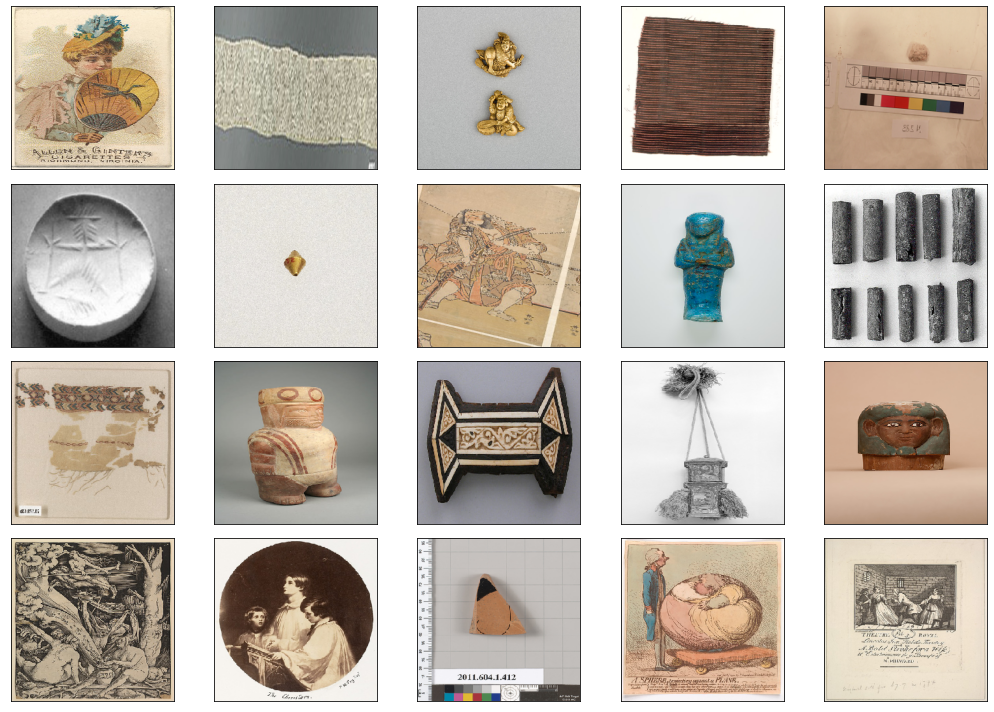

In [14]:
import matplotlib.pyplot as plt

train_gen_flow, _ = get_train_valid_flow(0)

features, target = next(train_gen_flow)

fig = plt.figure(figsize=(15,10))
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [15]:
import os, sys
import time
import datetime
from datetime import date
from datetime import datetime

timestr = time.strftime("%Y%m%d-%H%M%S")

SAVE_DIR = '' + timestr + '_EP' + str(NUM_EPOCHS) + "/"


try:
    os.mkdir(SAVE_DIR)
except OSError:
    print ("Creation of the directory %s failed" % SAVE_DIR)
else:
    print ("Successfully created the directory %s " % SAVE_DIR)

#Enable logging
old_stdout = sys.stdout
log_file = open(SAVE_DIR + "training_log.log","a+")
sys.stdout = log_file

print()
print(timestr, '######################################')
print('Start training with params:')
print('FOLDS', labels_kfold.fold.unique())
print('BATCH_SIZE', BATCH_SIZE)
print('NUM_EPOCHS', NUM_EPOCHS)
print('LR', LR)

Successfully created the directory 20200527-161118_EP15/ 
  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [ ]:
import numpy as np
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

for f in labels_kfold.fold.unique():    
    
    train_gen_flow, valid_gen_flow = get_train_valid_flow(f)
    
    model = create_model()
    # COMPILE NEW MODEL
    
    # CREATE CALLBACKS
    #lr_sched = LearningRateScheduler(lambda epoch: 0.005 if epoch <= 15  else 0.005/5)
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(SAVE_DIR+'model_'+str(f)+'.h5', 
                            monitor='val_f_score', 
                            verbose=2, 
                            save_best_only=True, mode='max')
    
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2)

    # initialize the cyclical learning rate callback
    #print("[INFO] using '{}' method".format(CLR_METHOD))
    #clr = CyclicLR(
    #    mode=CLR_METHOD,
    #    base_lr=MIN_LR,
    #    max_lr=MAX_LR,
    #    step_size= STEP_SIZE * (train_gen_flow.samples // BATCH_SIZE))
    
    callbacks_list = [checkpoint, reduce_lr]#, lr_sched]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    
    
    H = model.fit(
        train_gen_flow,
        steps_per_epoch = train_gen_flow.samples // (BATCH_SIZE), 
        epochs=NUM_EPOCHS,
        validation_data=valid_gen_flow,
        callbacks=callbacks_list,
        verbose=2, 
        validation_steps= valid_gen_flow.samples // (BATCH_SIZE)) 
    
    
    # construct a plot that plots and saves the training history
    N = np.arange(0, NUM_EPOCHS)
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, H.history["loss"], label="train_loss")
    plt.plot(N, H.history["val_loss"], label="val_loss")
    plt.plot(N, H.history["f_score"], label="f_score")
    plt.plot(N, H.history["val_f_score"], label="val_f_score")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(SAVE_DIR + 'training_plot_fold_' + str(f) + '.png')
    
    # plot the learning rate history
    #N = np.arange(0, len(clr.history["lr"]))
    plt.figure()
    plt.plot(N, H.history["lr"], label="lr")
    plt.title("ReduceLROnPlateau Learning Rate (CLR)")
    plt.xlabel("Epoch #")
    plt.ylabel("Learning Rate")
    plt.savefig(SAVE_DIR + 'lr_plot_fold_' + str(f) + '.png')
    
    
    #history = model.fit(train_gen_flow,
    #            epochs=NUM_EPOCHS,
    #            callbacks=callbacks_list,
    #            validation_data=valid_gen_flow)
    #PLOT HISTORY
    #        :
    #        :
    
    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights(SAVE_DIR + "model_"+str(f)+".h5")
    
    results = model.evaluate(valid_gen_flow, verbose=2)
    results = dict(zip(model.metrics_names,results))
    
    VALIDATION_ACCURACY.append(results['f_score'])
    VALIDATION_LOSS.append(results['loss'])
    
    
print('Validation accuracy', VALIDATION_ACCURACY)
print('Validation loss', VALIDATION_LOSS)
print('Average validation F2-score:', np.round(np.mean(VALIDATION_ACCURACY),3))

#Disable logging
sys.stdout = old_stdout
log_file.close()

In [ ]:
weights = []
for f in labels_kfold.fold.unique():  
    model.load_weights(SAVE_DIR + "model_"+str(f)+".h5")
    weights.append(model.get_weights())
    
#weights = [model.get_weights() for model in models]

#new average weights

new_weights = list()
for weights_list_tuple in zip(*weights): 
    new_weights.append(
        np.array([np.array(w).mean(axis=0) for w in zip(*weights_list_tuple)])
    )
    
#creating model with averaged weights
new_model = create_model()
new_model.set_weights(new_weights)
new_model.save(SAVE_DIR + 'all_folds_avg_model.h5')

In [ ]:
class_names = list(labels_kfold.columns[3:])
with open(SAVE_DIR + "class_names.txt", "w") as f:
    for s in class_names:
        f.write(str(s) +"\n")